In [13]:
import pandas as pd  
import numpy as np 
from collections import Counter


# 加载数据

In [14]:
data = pd.read_csv('wisconsin_dells.csv')

data.head()

,id,nnights,nadults,nchildren,planning,sex,age,education,income,region,...,helicopter,horseride,standrock,outattract,nearbyattract,movietheater,concerttheater,barpubdance,shopbroadway,bungeejumping
0,1,3,2,3,This Month,Female,35-44,HS Grad or Less,Lower Income,Other,...,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO
1,2,3,4,5+,One Month or More Ago,Male,35-44,College Grad,NaN,Minneapolis/StPaul,...,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO
2,3,4+,2,2,One Month or More Ago,Male,35-44,College Grad,Lower Income,Chicago,...,NO,YES,YES,YES,YES,NO,YES,NO,YES,NO
3,4,3,1,1,This Month,Female,35-44,Post Grad,Lower Income,Chicago,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
4,5,4+,5+,5+,One Month or More Ago,Female,35-44,Post Grad,NaN,Other,...,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO


# 生成二进制活动矩阵

In [15]:
binary_activity_data_frame  = pd.DataFrame()

for column in data.columns[10:]:
    binary_activity_data_frame[column]=(data[column]=='YES').astype('int') 
    
binary_activity_matrix = binary_activity_data_frame.as_matrix().T

print(data.columns[10:])
binary_activity_matrix

Index(['shopping', 'antiquing', 'scenery', 'eatfine', 'eatcasual',
       'eatfamstyle', 'eatfastfood', 'museums', 'indoorpool', 'outdoorpool',
       'hiking', 'gambling', 'boatswim', 'fishing', 'golfing', 'boattours',
       'rideducks', 'amusepark', 'minigolf', 'gocarting', 'waterpark',
       'circusworld', 'tbskishow', 'helicopter', 'horseride', 'standrock',
       'outattract', 'nearbyattract', 'movietheater', 'concerttheater',
       'barpubdance', 'shopbroadway', 'bungeejumping'],
      dtype='object')


array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

# 求距离矩阵(曼哈顿距离)

In [17]:
from sklearn.metrics.pairwise import manhattan_distances
distance_matrix = manhattan_distances(binary_activity_matrix)
distance_matrix    

array([[   0., 1082.,  547., ..., 1033.,  338., 1277.],
       [1082.,    0.,  967., ...,  553.,  976.,  399.],
       [ 547.,  967.,    0., ...,  948.,  609., 1118.],
       ...,
       [1033.,  553.,  948., ...,    0.,  901.,  462.],
       [ 338.,  976.,  609., ...,  901.,    0., 1141.],
       [1277.,  399., 1118., ...,  462., 1141.,    0.]])

# MDS降维

In [24]:
from sklearn import manifold
mds_solution = manifold.MDS(n_components=2,random_state = 9999,dissimilarity = 'precomputed').fit_transform(distance_matrix)
print(mds_solution)

[[ 257.17842073 -664.85197657]
 [-322.85929303  518.4121569 ]
 [  27.69196469 -553.00049186]
 [-410.34538199   58.84301133]
 [ 475.74069929 -266.07190077]
 [ 307.90450439 -488.06988726]
 [-470.39334113 -413.49119878]
 [ 455.08365551  -81.30489349]
 [-229.81384433 -370.18224684]
 [-162.4649258  -506.5401914 ]
 [  71.85252955  564.58503196]
 [-534.53393777  109.30604957]
 [-295.51373645 -246.09389197]
 [-221.56504544  428.68784299]
 [-442.95160452  406.55711543]
 [ 350.90256554  -77.21537223]
 [ 522.2181331   -36.19785962]
 [  87.85509913 -428.35305959]
 [ 330.16375097 -347.06009949]
 [ -39.95004738 -290.91226999]
 [-183.56473158 -653.49812312]
 [ 271.98977914  426.46753723]
 [ 433.73542965  184.73385437]
 [ -49.78165268  577.47152156]
 [-140.98220856  260.64965734]
 [ 192.72952174  473.52618676]
 [  83.78844385  -28.55471705]
 [ 197.43820505  130.35585248]
 [-146.05267374  560.66561849]
 [ -10.20948237  423.70484139]
 [-405.30984089  284.62818648]
 [ 207.51167147 -591.72463779]
 [-207.4

# 绘制图像

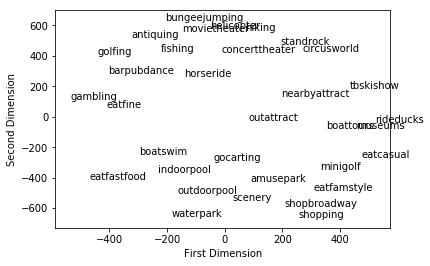

In [25]:
import matplotlib.pyplot as plt 


plt.scatter(mds_solution[:,0],mds_solution[:,1],facecolors = 'none', edgecolors = 'none') 
labels = data.columns[10:]
for label, x, y in zip(labels, mds_solution[:,0], mds_solution[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')    
plt.show()

# 欧氏距离

In [22]:
mds_solution = manifold.MDS(n_components=2,random_state = 9999).fit_transform(binary_activity_matrix)

